# A Restricted Boltzmann Machine (RBM)
## Is a type of artificial neural network used for various machine learning tasks
### In this notebook was using for dimensionality reduction


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.preprocessing
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM #restricted boltzmann machine
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


[BernoulliRBM] Iteration 1, pseudo-likelihood = -26.83, time = 0.03s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -26.30, time = 0.05s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -26.15, time = 0.06s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -26.18, time = 0.05s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -26.10, time = 0.05s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -26.02, time = 0.05s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -26.00, time = 0.06s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -25.99, time = 0.05s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -26.04, time = 0.05s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -26.03, time = 0.05s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -26.05, time = 0.04s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -26.02, time = 0.07s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -26.01, time = 0.05s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -25.96, time = 0.05s
[BernoulliRBM] Iteration 15, 

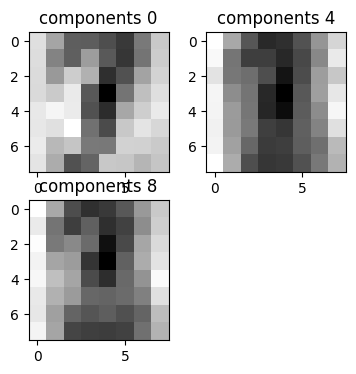

In [8]:
# Load the digits dataset (MNIST)
digits = datasets.load_digits()
# convert pixes to array
X = np.asarray(digits.data, 'float32')
# Split it into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, digits.target, test_size=0.2, random_state=0)
# Scale the data
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)
# Models we will use
# hyperparameter
n_components = 50 # how many dimensions will be results as a result of RBM
learning_rate = 0.01
n_iter = 25
rbm = BernoulliRBM(random_state=0,
                   n_components = n_components,
                   n_iter=n_iter,
                   learning_rate=learning_rate,
                   verbose=True )
# train in RBM, to dimensionality reduction
rbm.fit(X_train)
# Plot the reconstructed digits
plt.figure(figsize=(4.2, 4))
for i, offset in enumerate(range(0, 10, 4)):
  plt.subplot(2, 2, i + 1)
  plt.imshow(np.reshape(rbm.components_[offset], (8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title("components %d" % offset)
plt.show()


In [12]:

import tensorflow as tf

# After dimensionality reduction with RBM
X_train_reduced = rbm.transform(X_train)
X_test_reduced = rbm.transform(X_test)

# Define the TensorFlow model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu', input_shape=(n_components,)),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_reduced, Y_train, epochs=200)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reduced, Y_test, verbose=0)
print("Test accuracy:", accuracy)


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1947 - loss: 2.2061
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4189 - loss: 1.9432
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5066 - loss: 1.6965
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5918 - loss: 1.4925
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5773 - loss: 1.3604
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6359 - loss: 1.2393
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6498 - loss: 1.1542
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6675 - loss: 1.0952
Epoch 9/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6680 - loss: 1.1112
Epoch 10/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6893 - loss: 0.9977
Epoch 11/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6819 - loss: 1.0097
Epoch 12/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6737 - lo

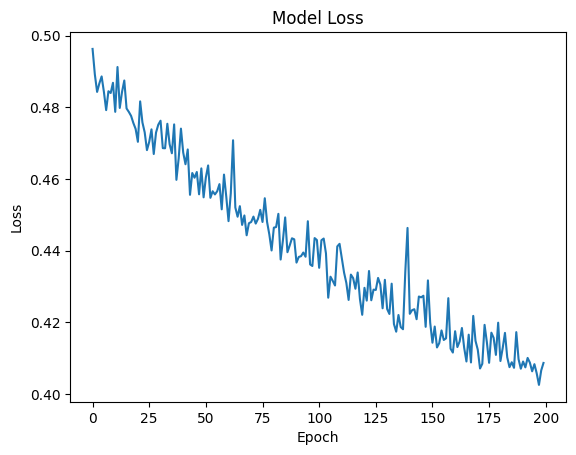

In [13]:

# Train the model and store the history
history = model.fit(X_train_reduced, Y_train, epochs=200, verbose=0)

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [14]:

import tensorflow as tf

# After dimensionality reduction with RBM
X_train_reduced = rbm.transform(X_train)
X_test_reduced = rbm.transform(X_test)

# Define the TensorFlow model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu', input_shape=(n_components,)),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_reduced, Y_train, epochs=500)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reduced, Y_test, verbose=0)
print("Test accuracy:", accuracy)

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1598 - loss: 2.2512
Epoch 2/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4219 - loss: 1.9771
Epoch 3/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5155 - loss: 1.7351
Epoch 4/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5584 - loss: 1.5292
Epoch 5/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6064 - loss: 1.3913
Epoch 6/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6121 - loss: 1.2947
Epoch 7/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6473 - loss: 1.1967
Epoch 8/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6389 - loss: 1.1758
Epoch 9/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6914 - loss: 1.0481
Epoch 10/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6683 - loss: 1.0465
Epoch 11/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6521 - loss: 1.0296
Epoch 12/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7053 - lo

In [15]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reduced, Y_test, verbose=0)
print("Test accuracy:", accuracy)


Test accuracy: 0.8500000238418579


In [17]:

# Define the TensorFlow model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu', input_shape=(n_components,)),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

# Train the model with early stopping
model.fit(X_train_reduced, Y_train, epochs=500, callbacks=[early_stopping], validation_data=(X_test_reduced, Y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reduced, Y_test, verbose=0)
print("Test accuracy:", accuracy)


Epoch 1/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1789 - loss: 2.2765 - val_accuracy: 0.2667 - val_loss: 2.0629
Epoch 2/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3455 - loss: 1.9614 - val_accuracy: 0.4222 - val_loss: 1.7977
Epoch 3/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5035 - loss: 1.7177 - val_accuracy: 0.5139 - val_loss: 1.6039
Epoch 4/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5682 - loss: 1.5354 - val_accuracy: 0.5278 - val_loss: 1.4582
Epoch 5/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6496 - loss: 1.3591 - val_accuracy: 0.5528 - val_loss: 1.3469
Epoch 6/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6364 - loss: 1.2477 - val_accuracy: 0.6111 - val_loss: 1.2737
Epoch 7/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6527 - loss: 1.1980 - val_accuracy: 0.6389 - val_loss: 1.1698
Epoch 8/500
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6444 - loss: 1.1457 - val_accuracy: 0.6694 - v

In [19]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_reduced, Y_test, verbose=1)
print("Test accuracy:", accuracy)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8349 - loss: 0.5089  
Test accuracy: 0.8277778029441833
